In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

Задание 1.

In [5]:
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
n = int(input())

 100


n*(underlined X) is  49.738 
n*S^2 is  24.999313559999997


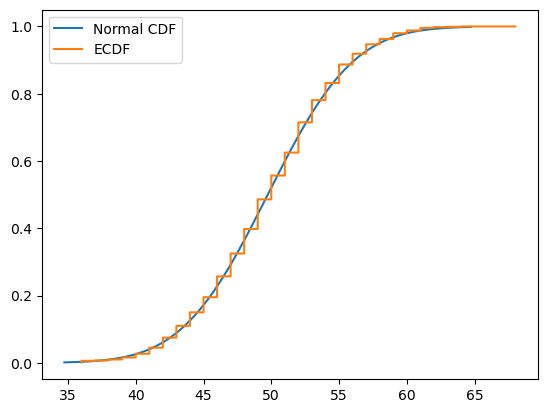

In [6]:
sums = np.array([0 for i in range(1000)])
sq_sums = np.array([0 for i in range(1000)])
tmp = None
for i in range(n):
    tmp = np.random.binomial(1, 0.5, 1000)
    sums += tmp
    sq_sums += tmp*tmp
    
n_exp = np.sum(sums)/1000
n_var = np.sum(sq_sums)/1000 - (n_exp)**2/n
print("n*(underlined X) is ", n_exp, "\nn*S^2 is ", n_var)

x = np.arange(n_exp - 3*(n_var**0.5), n_exp + 3*(n_var**0.5), 0.01)
plt.plot(x, sc.stats.norm.cdf(x, n_exp, n_var**0.5), label="Normal CDF")

ecdf = ECDF(sums)
plt.step(ecdf.x, ecdf.y, label="ECDF")
plt.legend(loc="upper left")

n*(underlined X) is  50.10989646785168 
n*S^2 is  8.325633032703106


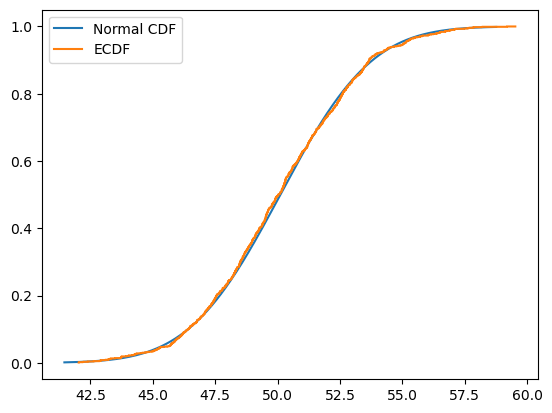

In [7]:
sums = np.array([0.0 for i in range(1000)])
sq_sums = np.array([0.0 for i in range(1000)])
tmp = None
for i in range(n):
    tmp = np.random.uniform(0, 1, 1000)
    sums += tmp
    sq_sums += tmp*tmp
    
n_exp = np.sum(sums)/1000
n_var = np.sum(sq_sums)/1000 - (n_exp)**2/n
print("n*(underlined X) is ", n_exp, "\nn*S^2 is ", n_var)

x = np.arange(n_exp - 3*(n_var**0.5), n_exp + 3*(n_var**0.5), 0.01)
plt.plot(x, sc.stats.norm.cdf(x, n_exp, n_var**0.5), label="Normal CDF")

ecdf = ECDF(sums)
plt.step(ecdf.x, ecdf.y, label="ECDF")
plt.legend(loc="upper left")

n*(underlined X) is  100.23618461637109 
n*S^2 is  100.2455963875518


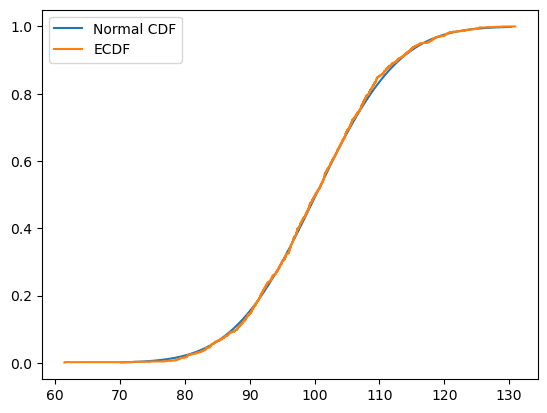

In [8]:
sums = np.array([0.0 for i in range(1000)])
sq_sums = np.array([0.0 for i in range(1000)])
tmp = None
for i in range(n):
    tmp = np.random.exponential(1, 1000)
    sums += tmp
    sq_sums += tmp*tmp
    
n_exp = np.sum(sums)/1000
n_var = np.sum(sq_sums)/1000 - (n_exp)**2/n
print("n*(underlined X) is ", n_exp, "\nn*S^2 is ", n_var)

x = np.arange(n_exp - 3*(n_var**0.5), n_exp + 3*(n_var**0.5), 0.01)
plt.plot(x, sc.stats.norm.cdf(x, n_exp, n_var**0.5), label="Normal CDF")

ecdf = ECDF(sums)
plt.step(ecdf.x, ecdf.y, label="ECDF")
plt.legend(loc="upper left")

n*(underlined X) is  334.88717540410624 
n*S^2 is  115972784.41791825


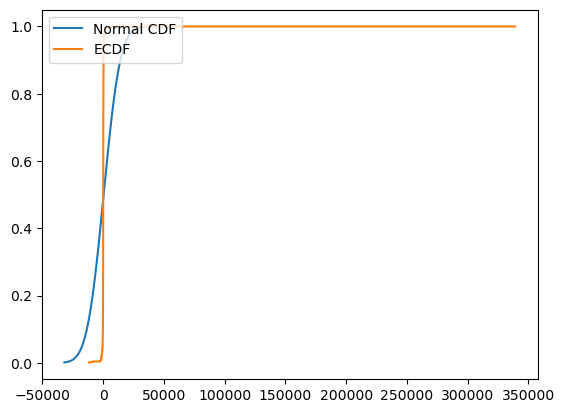

In [9]:

sums = np.array([0.0 for i in range(1000)])
sq_sums = np.array([0.0 for i in range(1000)])
tmp = None
for i in range(n):
    tmp = np.random.standard_cauchy(1000)
    sums += tmp
    sq_sums += tmp*tmp
    
n_exp = np.sum(sums)/1000
n_var = np.sum(sq_sums)/1000 - (n_exp)**2/n
print("n*(underlined X) is ", n_exp, "\nn*S^2 is ", n_var)

x = np.arange(n_exp - 3*(n_var**0.5), n_exp + 3*(n_var**0.5), 0.01)
plt.plot(x, sc.stats.norm.cdf(x, n_exp, n_var**0.5), label="Normal CDF")

ecdf = ECDF(sums)
plt.step(ecdf.x, ecdf.y, label="ECDF")
plt.legend(loc="upper left")

Задание 2.

 10


2.5 0.7905694150420949


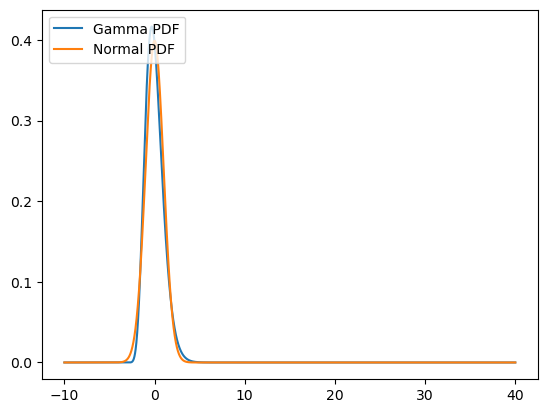

In [14]:
from scipy.stats import gamma

def func(v):
    return gamma.pdf(4*(n**0.5)*v + 4*n, n, loc=0, scale=4) * 4*(n**0.5)

n = int(input())
x = np.arange(-10, 40, 0.01)
y = [func(x[i]) for i in range(len(x))]

plt.plot(x, y, label="Gamma PDF")
plt.plot(x, sc.stats.norm.pdf(x, 0, 1), label="Normal PDF")
plt.legend(loc="upper left")
print(n/4, (n**0.5)/4)

Задание 3. (Вариант 2)

 1000
 1000
 0.7


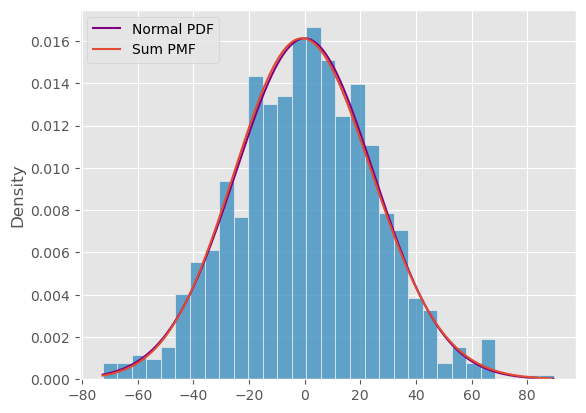

In [107]:
n = int(input())
k = int(input())
p = float(input())

matplotlib.style.use('ggplot')

#Geom для k>=0
s = [np.sum(np.random.geometric(p, n)) - n/p for i in range(k)]
s = np.array(s)

x = np.arange(min(s), max(s), 0.1)

sns.histplot(s, bins=int(k**0.5), stat="density")
plt.plot(x,
         sc.stats.norm.pdf(x, 0, (((1-p)/p**2)*n)**0.5), 
         label='Normal PDF', color='purple')

#NBinom для k>=1, поэтому берется EX Geom k>=1
x = np.arange(min(s), max(s), 1)
plt.plot(x, sc.stats.nbinom.pmf(x-n+n/p, n, p), label='Sum PMF')

plt.legend(loc="upper left")

 1000
 1000
 3
 3


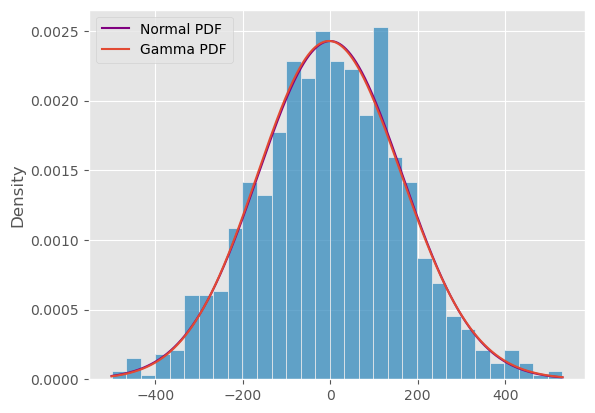

In [24]:
n = int(input())
k = int(input())
a = float(input())
b = float(input())
matplotlib.style.use('ggplot')

s = [np.sum(np.random.gamma(a, b, n))-n*a*b for i in range(k)]
s = np.array(s)


x = np.arange(min(s), max(s), 0.01)

plt.plot(x,
         sc.stats.norm.pdf(x, 0, (n*(a*b**2))**0.5), 
         label='Normal PDF', color='purple')

plt.plot(x,
         sc.stats.gamma.pdf(x+n*a*b, n*a, scale=b), 
         ms=8, label='Gamma PDF')

sns.histplot(s, bins=int(k**0.5), stat="density")

plt.legend(loc="upper left")

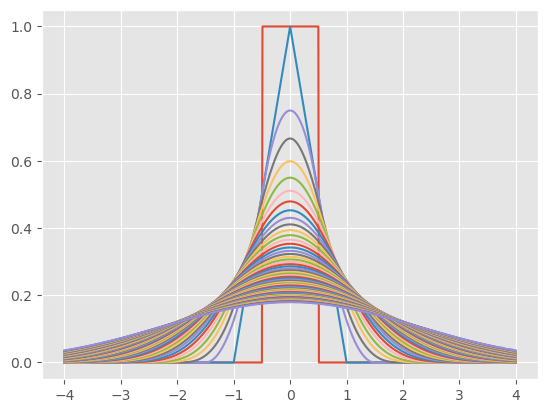

In [25]:
from math import comb, factorial

def irwinhall(x, n):
    if x > n or x < 0:
        return 0
    
    if n == 1:
        return 1
    elif n == 2:
        if x < 1:
            return x
        else:
            return 2-x
    else:
        res = 0
        for k in range(n+1):
            if x-k > 0:
                res += ((-1)**k) * comb(n,k) * ((x-k)**(n-1))
                
        res /= factorial(n-1)
        return res

x = np.arange(-4, 4, 0.01)

for i in range(1, 60):
    y = [irwinhall(elem+i/2, i) for elem in x]
    plt.plot(x, y)

 45
 1000


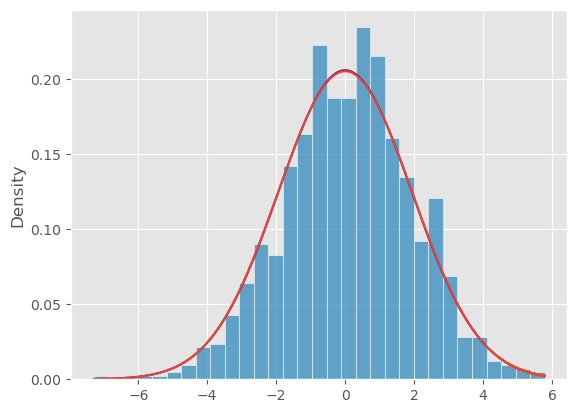

In [27]:
n = int(input())
k = int(input())

s = [np.sum(np.random.uniform(0, 1, n))-n/2 for i in range(k)]
s = np.array(s)

x = np.arange(min(s), max(s), 0.0001)

sns.histplot(s, bins=int(k**0.5), stat="density")
plt.plot(x,
         sc.stats.norm.pdf(x, 0, (n/12)**0.5), 
         label='Normal PDF', color='purple')


y = [irwinhall(elem+n/2, n) for elem in x]
plt.plot(x, y)

4. Обозначим Y = (Sn − nμ)/(σ√n). Построить на одном графике: FY (x) − Φ(x), 
правую часть неравенства Берри–Эссеена, ее же, умноженную на -1, правую часть асимптотического разложения.
Рассмотреть n = 5, 10, 20, 50, 100, 500. Соотнести полученные результаты с теоремами 3 и 4.
Рассмотрите следующие распределения Xi: Bern(p), exp(λ).

 0.43


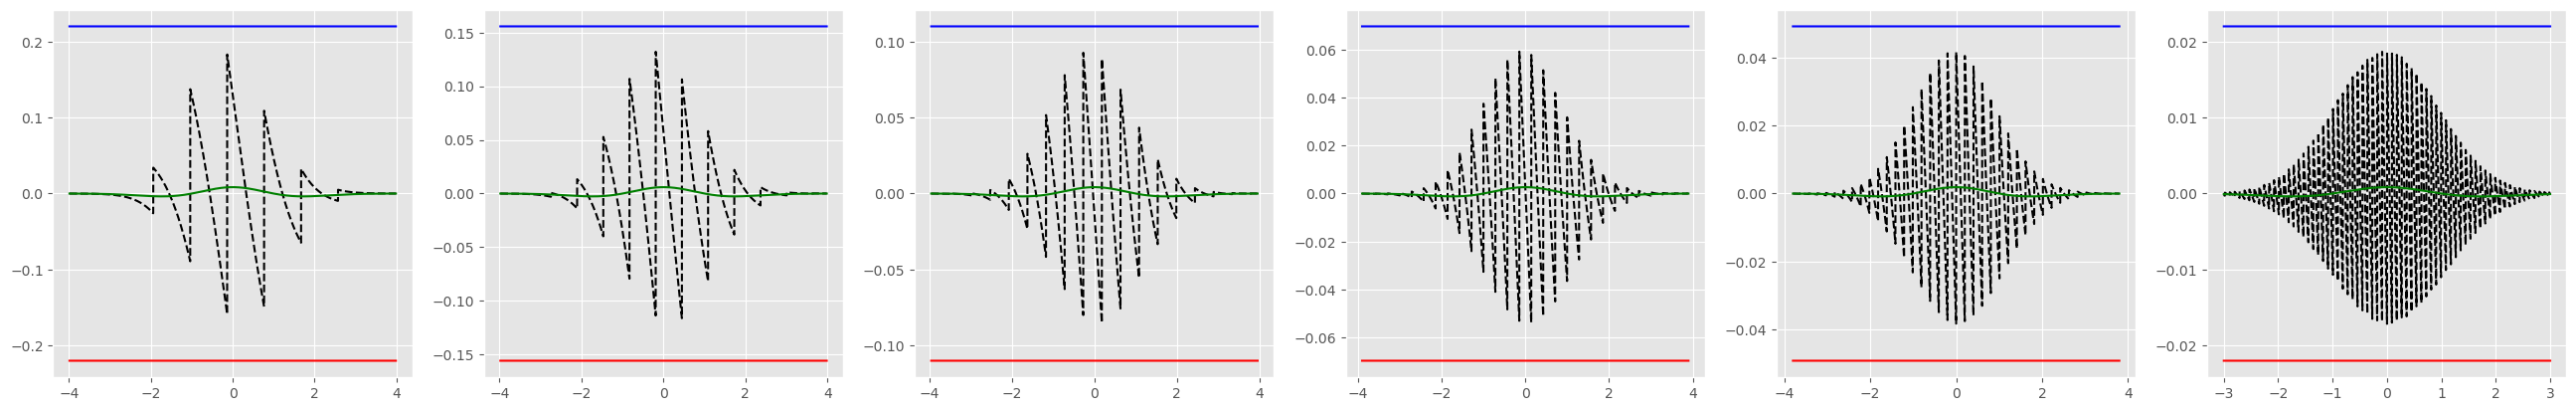

In [5]:
#Случай 1. Bern(p), S(n) ~ Binom(n, p)

matplotlib.style.use('ggplot')

def difference(x, n, p):
    return (sc.stats.binom.cdf(x*(p*(1-p)*n)**0.5 + n*p, n, p)
            - sc.stats.norm.cdf(x, 0, 1))

def berry_esseen(n, p):
    return (0.4784*((1-p)**3 * p + p**3 * (1-p))/
            n**0.5 / (p*(1-p))**(1.5))
    
def asymptotic(x, n, p):
    r = (1-p)**3 * p - p**3 * (1-p)
    var = (p*(1-p))**(3/2)
    a = r/var
    return (a/(6*(np.pi*2*n)**0.5)
            * (1-x**2) * np.exp(-(x**2)/2))
    
plt.subplots_adjust(left=0.05, right=4)

N = [5, 10, 20, 50, 100, 500]
p = float(input())
for i in range(len(N)):
    plt.subplot(1, len(N), i+1)
    n = N[i]
    coor_x = np.arange(-4+(n/500), 4-(n/500), 0.001)
    coor_y = [difference(x, n, p) for x in coor_x]
    plt.plot(coor_x, coor_y, '--', color='black', label='CLT difference')
    
    coor_y = [berry_esseen(n, p) for x in coor_x]
    plt.plot(coor_x, coor_y, '-', color='blue', label='B-E')
    
    coor_y = [-y for y in coor_y]
    plt.plot(coor_x, coor_y, '-', color='red', label='B-E')
    
    coor_y = [asymptotic(x, n, p) for x in coor_x]
    plt.plot(coor_x, coor_y, color='green', label='Asymp')
    

 4


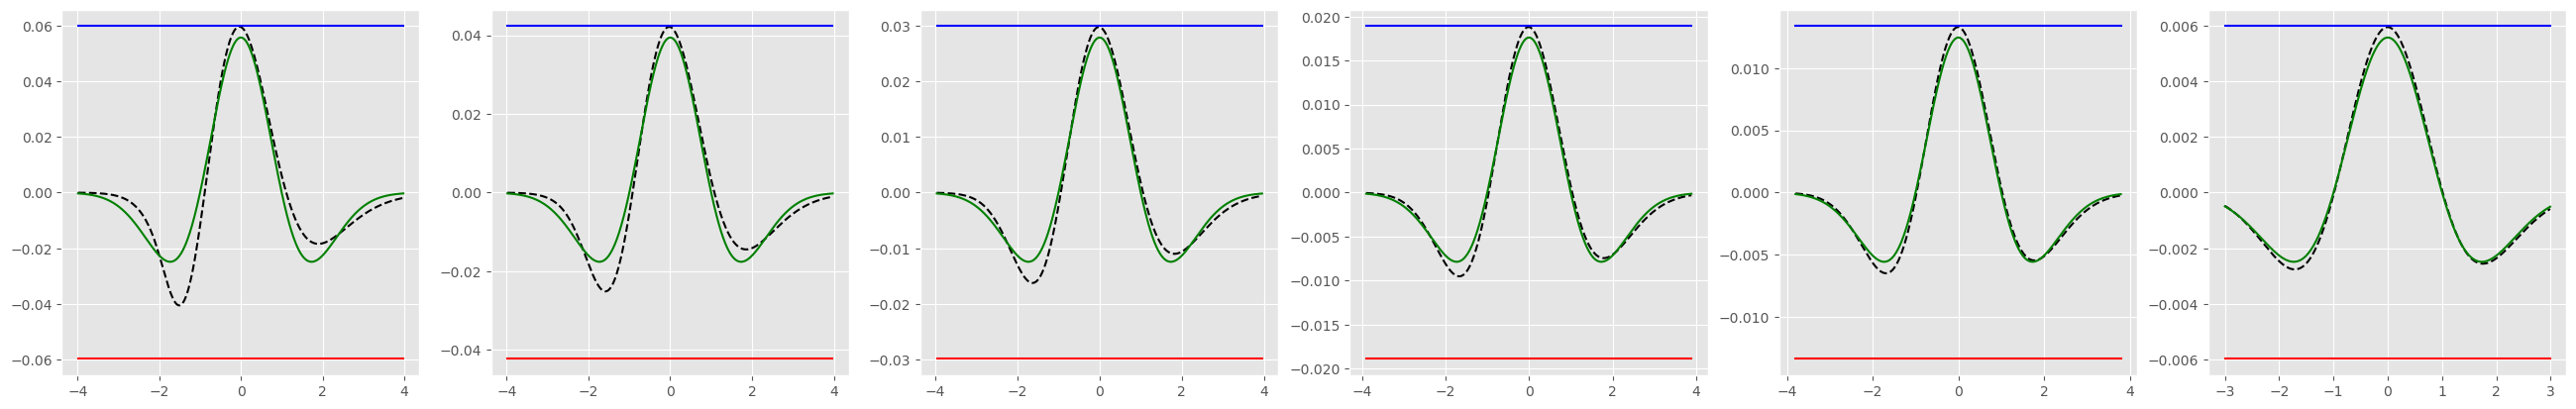

In [108]:
#Случай 2. Exp(1), Sn ~ Gamma(1, n)

def difference(x, n, p):
    return (sc.stats.gamma.cdf(x/p * n**0.5 + n/p, n, scale=1/p)
            - sc.stats.norm.cdf(x, 0, 1))

def berry_esseen(n, p, ex):
    return (0.4784*(ex)/
            n**0.5/(1/p**3))
    
def asymptotic(x, n, p, ex):
    r = ex
    var = 1/p**3
    a = r/var
    return (a/(6*(np.pi*2*n)**0.5)
            * (1-x**2) * np.exp(-(x**2)/2))
    
plt.subplots_adjust(left=0.05, right=4)

N = [5, 10, 20, 50, 100, 500]
p = float(input())

#3-ий момент
x = sc.stats.expon.rvs(scale=1/p, size=10000)
x -= np.mean(x)
x = x**3
ex3 = np.mean(x)

x = x**1/3
x = np.abs(x)
x = x**3
abs_ex3 = np.mean(x)

for i in range(len(N)):
    plt.subplot(1, len(N), i+1)
    n = N[i]
    coor_x = np.arange(-4+(n/500), 4-(n/500), 0.01)
    coor_y = [difference(x, n, p) for x in coor_x]
    plt.plot(coor_x, coor_y, '--', color='black', label='CLT difference')
    
    coor_y = [berry_esseen(n, p, abs_ex3) for x in coor_x]
    plt.plot(coor_x, coor_y, '-', color='blue', label='B-E')
    
    coor_y = [-y for y in coor_y]
    plt.plot(coor_x, coor_y, '-', color='red', label='B-E')
    
    coor_y = [asymptotic(x, n, p, ex3) for x in coor_x]
    plt.plot(coor_x, coor_y, color='green', label='Asymp')